In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

df = pd.read_csv("study_performance.csv")
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Data Cleaning
print(df.info())          # Check data types
print(df.isnull().sum())  # Check for missing values

# If any missing values:
df = df.dropna()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype

In [4]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
# Encode categorical variables
label_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


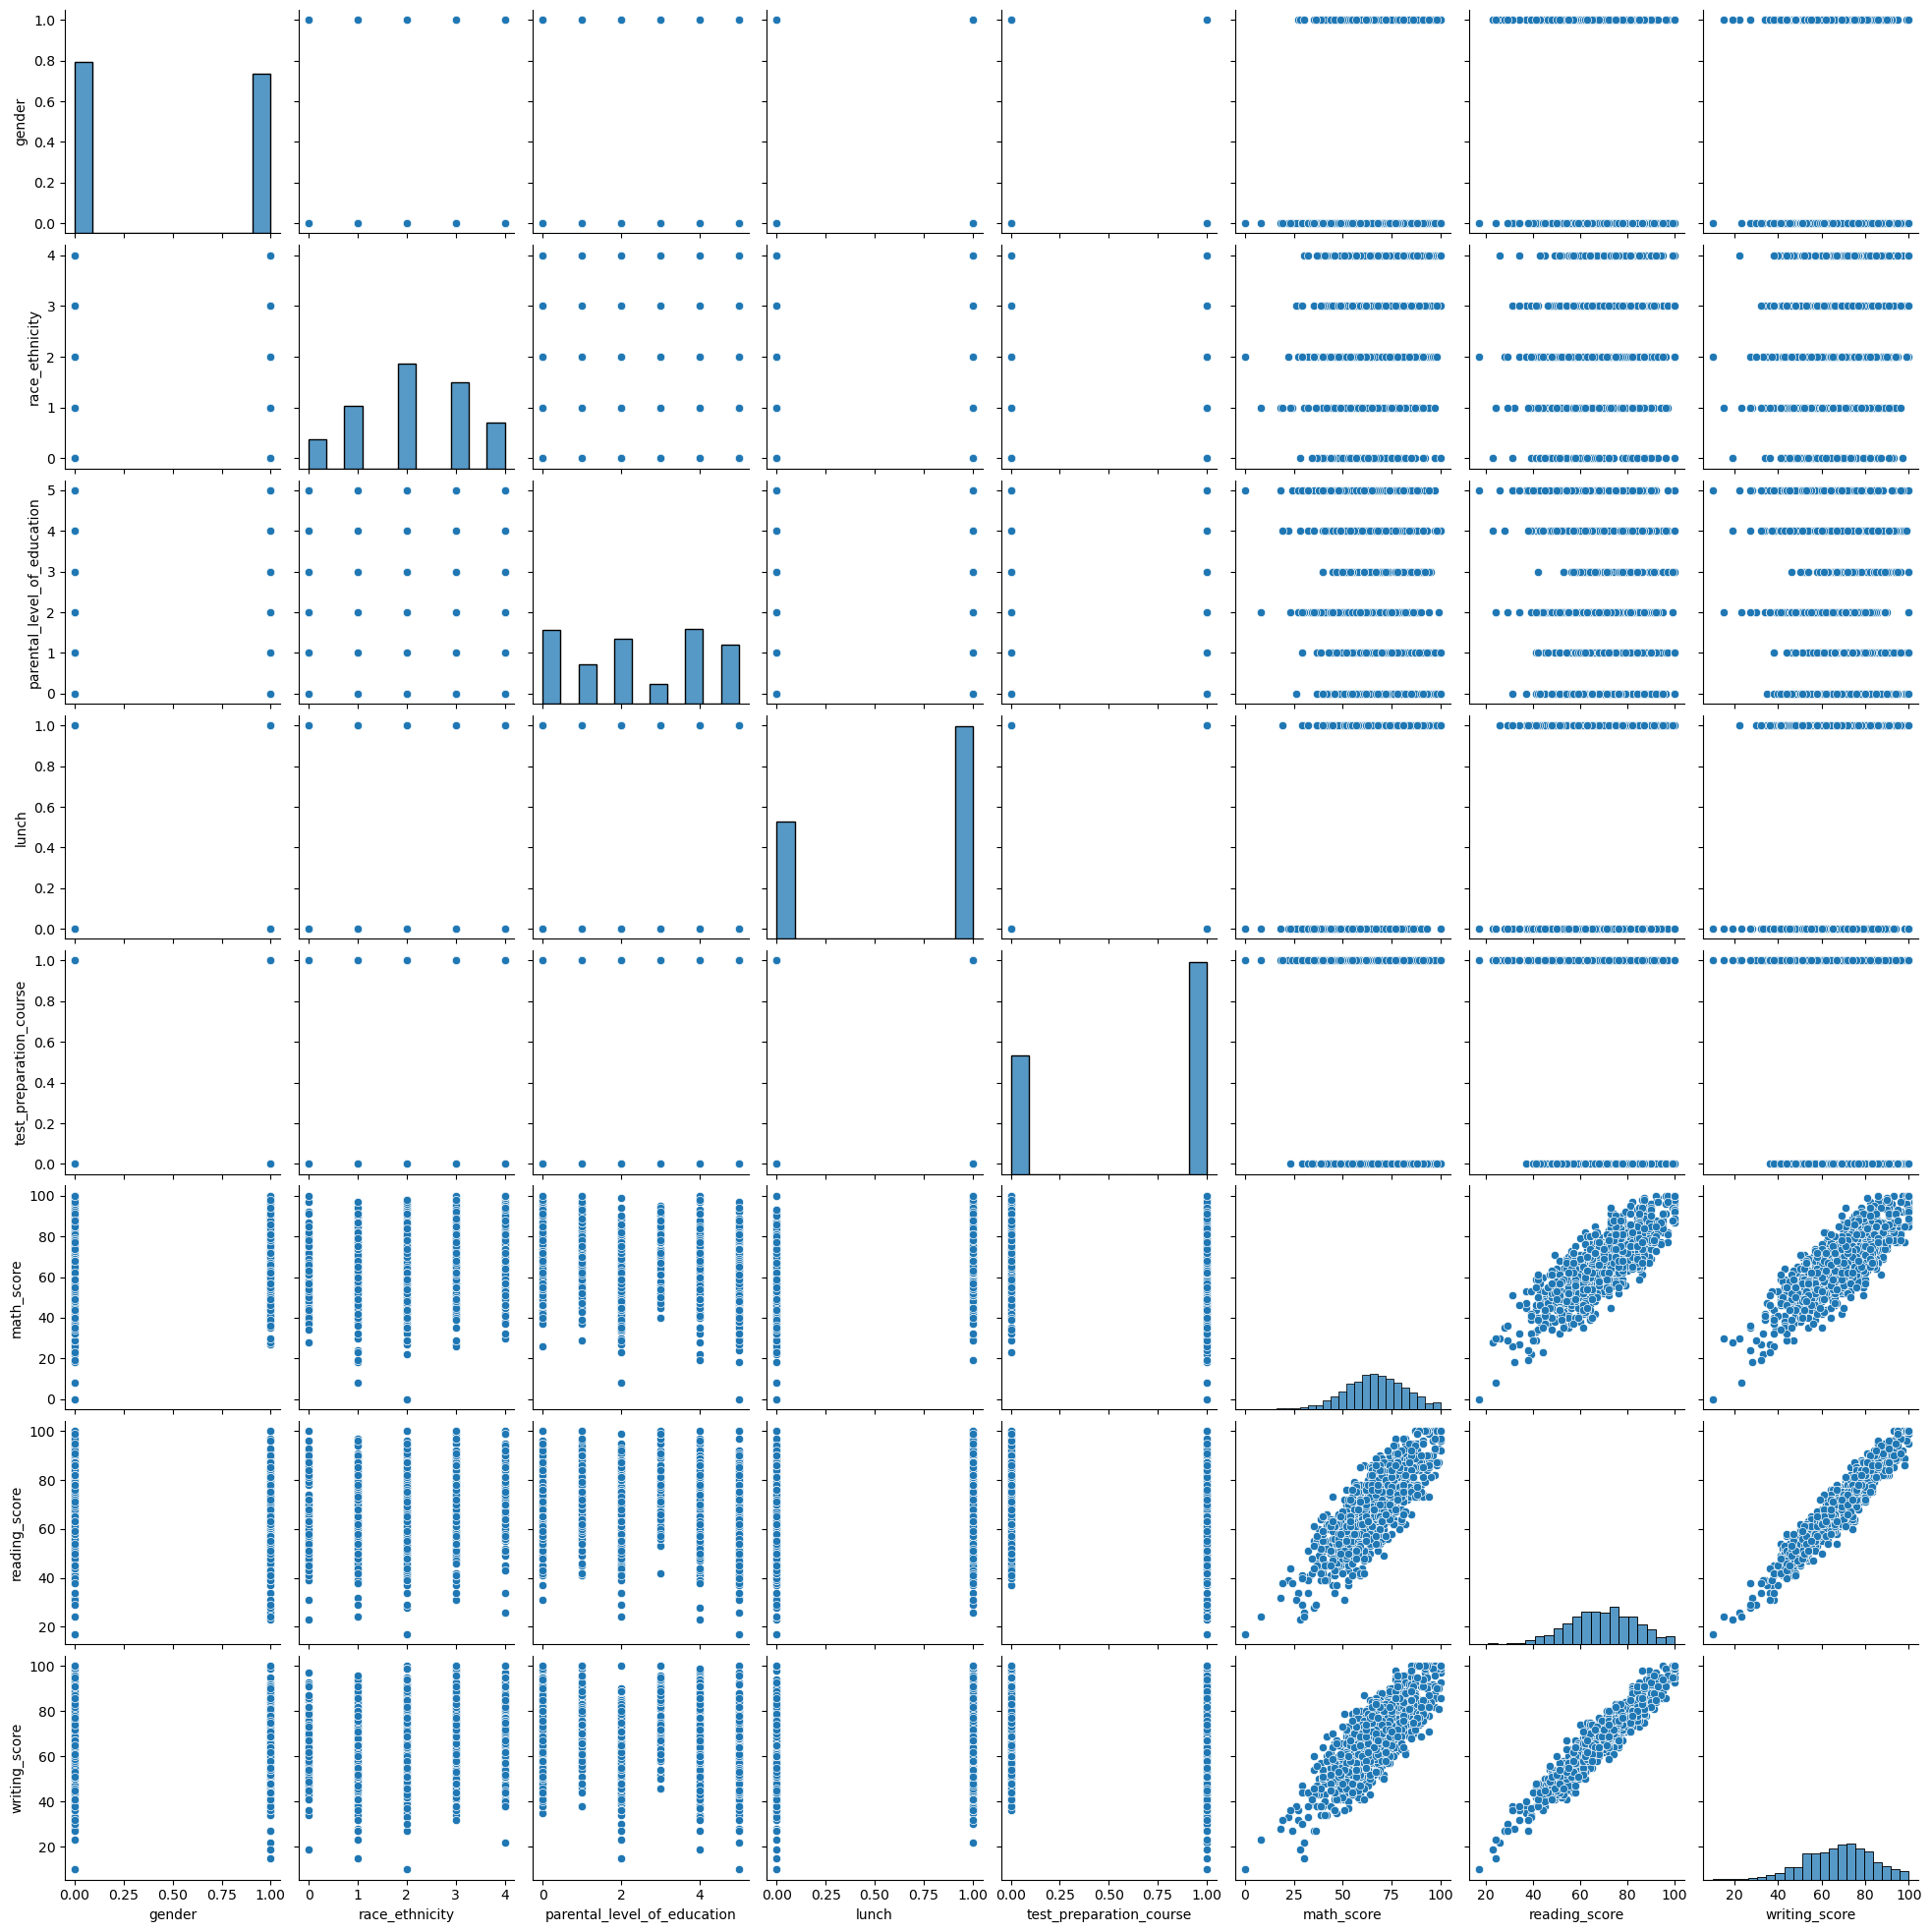

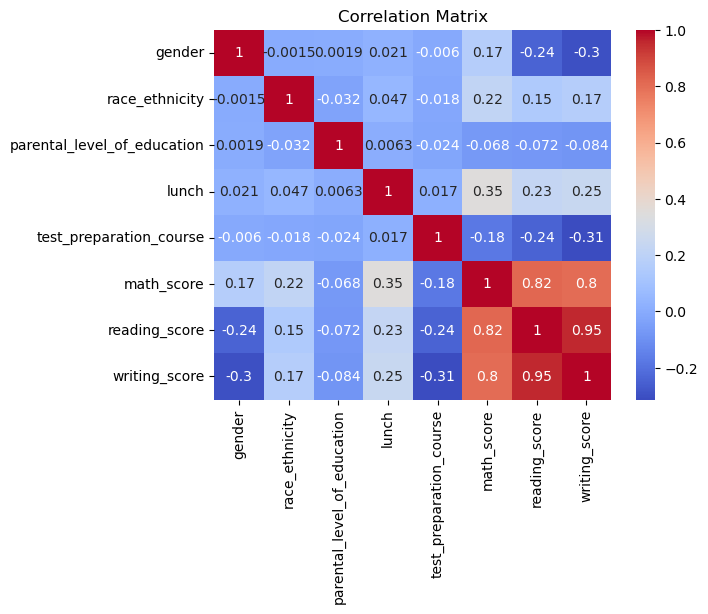

In [5]:
#Exploratory Data Analysis (Optional)
sns.pairplot(df)
plt.show()

correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
# Step 4: Define Features and Target
X = df[['gender', 'race_ethnicity', 'parental_level_of_education',
        'lunch', 'test_preparation_course', 'reading_score', 'writing_score']]
y = df['math_score']

In [7]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# ✨ Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.94880848,  0.71030099,  0.29665852, ...,  0.73178456,
         0.03079054,  0.43405338],
       [-0.94880848, -0.15460128, -0.80207674, ..., -1.36652242,
         0.9302895 ,  0.96470125],
       [-0.94880848,  0.71030099,  0.84602615, ...,  0.73178456,
         1.34544287,  1.1636942 ],
       ...,
       [-0.94880848, -0.15460128, -1.35144437, ...,  0.73178456,
        -0.52274728, -1.02522827],
       [ 1.05395348, -0.15460128,  0.84602615, ..., -1.36652242,
        -1.49143847, -1.02522827],
       [-0.94880848,  0.71030099, -1.35144437, ...,  0.73178456,
         1.48382733,  1.36268716]])

In [9]:

# Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:

# Step 7: Predict
# Predict
y_pred = model.predict(X_test_scaled)

In [11]:
y_pred

array([77.11855699, 57.07358   , 79.35766788, 77.15093246, 84.91283746,
       79.85882914, 64.42312794, 52.47379147, 74.61139924, 50.01079481,
       50.44499321, 34.35758768, 66.28655135, 53.66602689, 87.80646619,
       72.17082069, 53.95429413, 49.37064522, 50.9262122 , 54.29513402,
       76.62310917, 40.71538364, 58.29731054, 37.36725562, 79.81455128,
       82.97797069, 78.19297014, 47.74573476, 30.07261305, 50.78240619,
       64.87175577, 71.33702911, 60.67758836, 80.02527415, 81.33394066,
       44.34870972, 77.69510363, 71.30097175, 68.74385772,  5.55960328,
       79.39326779, 67.03153924, 70.24327126, 57.98869524, 81.84992687,
       63.32744767, 72.92197518, 25.23196669, 88.34098662, 68.57937392,
       74.78793329, 68.47641886, 81.93280101, 44.45521451, 66.816886  ,
       68.45481502, 87.85867411, 59.7048815 , 82.00776395, 79.76782416,
       46.22592721, 72.64647108, 71.08502792, 53.81716683, 89.61629394,
       65.04085968, 60.6108109 , 55.94870276, 57.79623104, 83.99

In [12]:
# Sample input (encoded): [female, group B, master's, standard lunch, no prep, 85, 88]
sample = [[0, 1, 2, 1, 0, 85, 88]]
sample_scaled = scaler.transform(sample)
predicted_math = model.predict(sample_scaled)
print("Predicted Math Score:", predicted_math[0])


Predicted Math Score: 76.02799328938609


C:\Users\PYTHON\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
